# **The Iris Flower Classification**
### **Classifying the Iris flower into Different Species based on their Sepal and Petal measurements using Random Forest Algorithm.**
## **Mercy Consolate Akello**
## **2024-01-11**

## **Introduction**

**The Iris flower dataset is a well-known and widely used dataset in the field of machine learning. It comprises three distinct species of Iris flowers: setosa, versicolor, and virginica. These species can be differentiated based on various measurements, such as sepal length, sepal width, petal length, and petal width. In this task, our objective is to develop a machine learning model that can effectively learn from these measurements and accurately classify Iris flowers into their respective species.**

**By leveraging the power of machine learning algorithms, we aim to train a model that can analyze the sepal and petal measurements of Iris flowers and make informed predictions about their species. This classification task is particularly valuable as it allows us to gain insights into the distinguishing characteristics of different Iris species and further our understanding of their unique traits.**

**The Iris dataset serves as an ideal starting point for introductory classification tasks due to its simplicity and well-defined nature. It provides a solid foundation for exploring and implementing various machine learning techniques, such as feature selection, model training, and evaluation. By working with this dataset, we can develop a robust model that can accurately classify Iris flowers based on their sepal and petal measurements.**

**In this project, I will utilize the Iris dataset to train and evaluate our machine learning model. By leveraging the rich information contained within the dataset, I aim to create a reliable and efficient model that can classify Iris flowers into their respective species with a high degree of accuracy. Through this task, we will gain valuable insights into the capabilities of machine learning algorithms and their potential applications in real-world classification problems.**

## **Load data**

In [1]:
library(readr)
iris <- read_csv("/content/IRIS.csv")

Rows: 150 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): species
dbl (4): sepal_length, sepal_width, petal_length, petal_width

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### **check for missing data**

In [2]:
colSums(is.na(iris))

sepal_length  sepal_width petal_length  petal_width      species 
           0            0            0            0            0

### **Check for duplicates**

In [3]:
duplicated(iris)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
 [37] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE

### **Convert species to factor**

In [4]:
iris$species=factor(iris$species)

## **Exploratory Data Analysis**
### **Numeric variable**

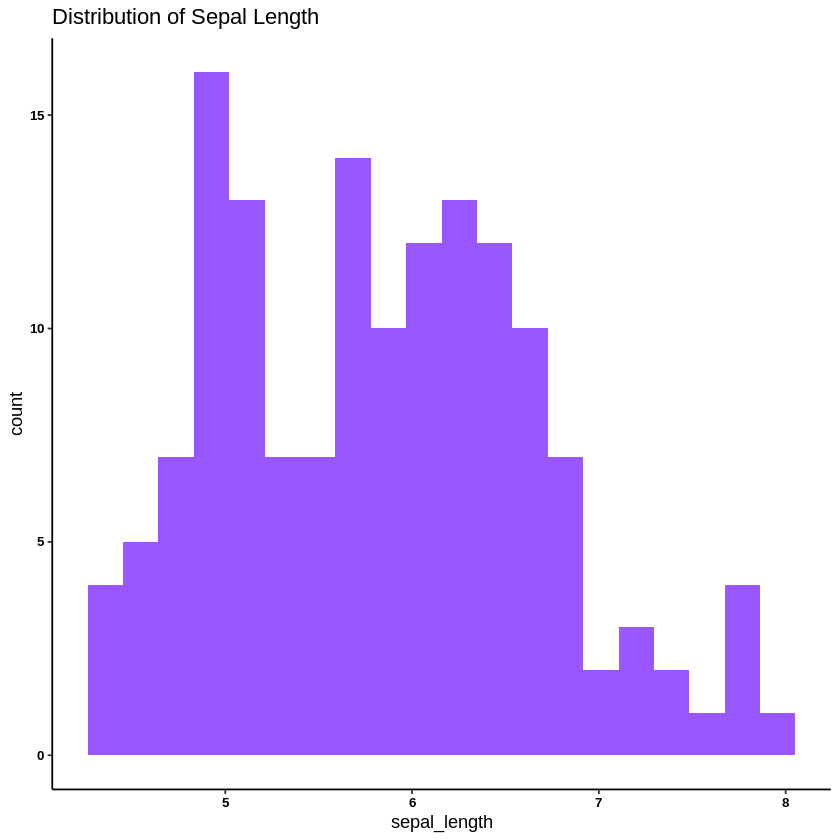

In [5]:
library(ggplot2)
ggplot(iris,aes(sepal_length))+
  geom_histogram(bins=20,fill='#9B57FF')+
  theme_classic()+
  theme(axis.text.x = element_text(size=8, face="bold", color = "black"),
        axis.text.y = element_text(size=8, face="bold", color = "black"))+
  labs(title = 'Distribution of Sepal Length')

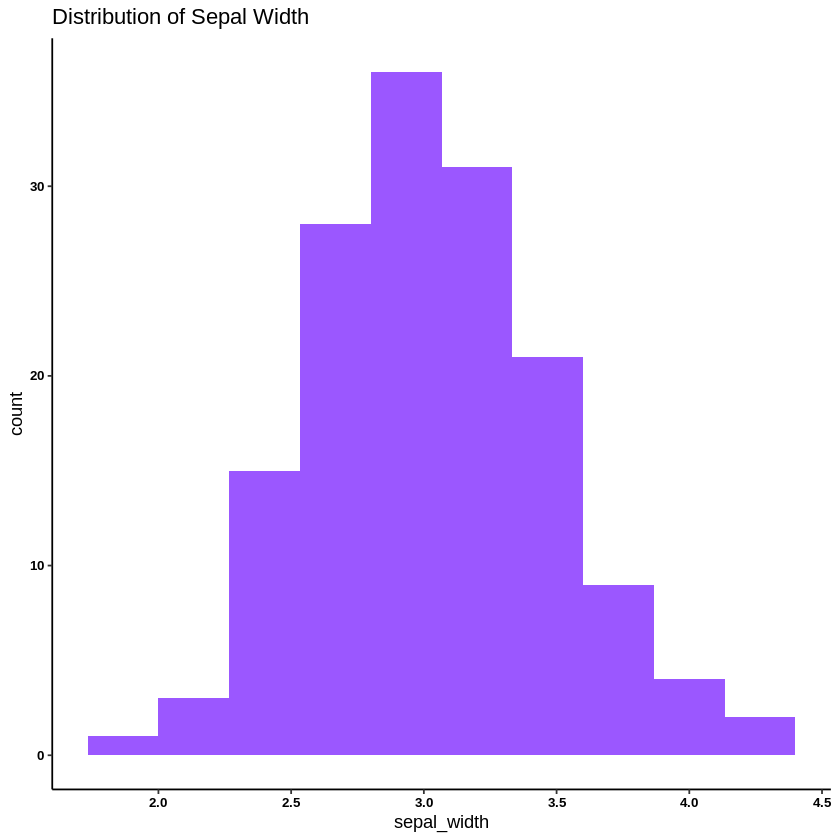

In [6]:
ggplot(iris,aes(sepal_width))+
  geom_histogram(bins=10,fill='#9B57FF')+
  theme_classic()+
  theme(axis.text.x = element_text(size=8, face="bold", color = "black"),
        axis.text.y = element_text(size=8, face="bold", color = "black"))+
  labs(title = 'Distribution of Sepal Width')

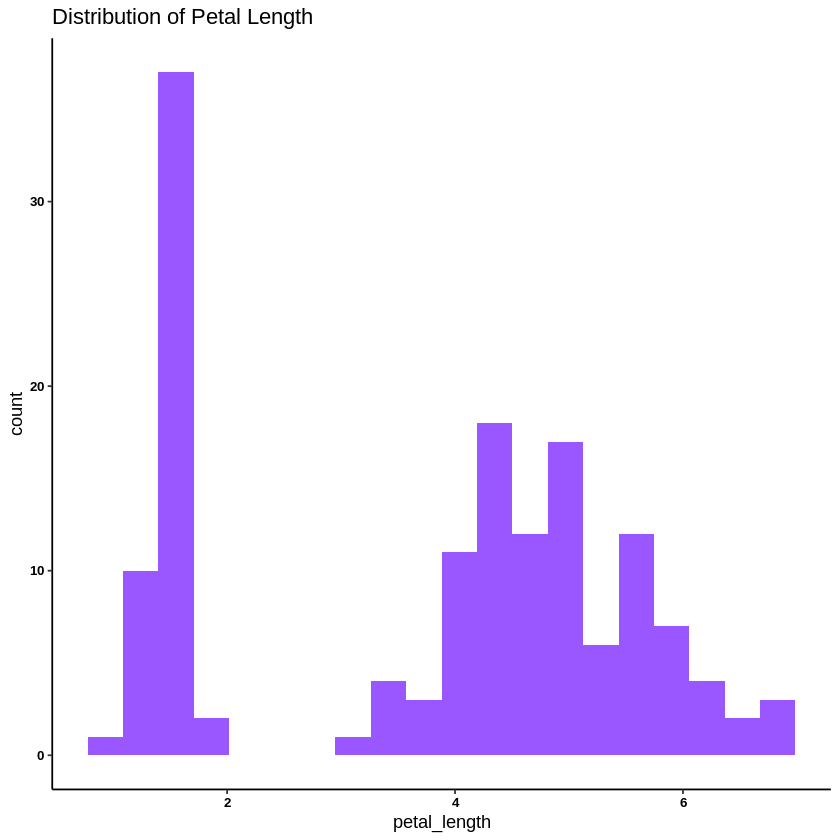

In [7]:
ggplot(iris,aes(petal_length))+
  geom_histogram(bins=20,fill='#9B57FF')+
  theme_classic()+
  theme(axis.text.x = element_text(size=8, face="bold", color = "black"),
        axis.text.y = element_text(size=8, face="bold", color = "black"))+
  labs(title = 'Distribution of Petal Length')

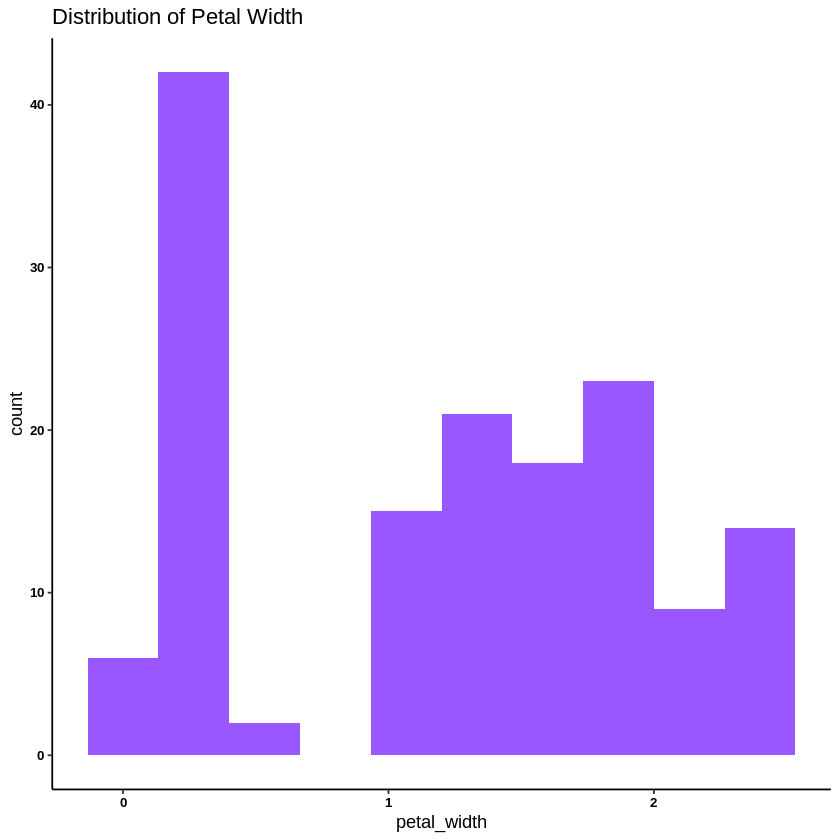

In [8]:
ggplot(iris,aes(petal_width))+
  geom_histogram(bins=10,fill='#9B57FF')+
  theme_classic()+
  theme(axis.text.x = element_text(size=8, face="bold", color = "black"),
        axis.text.y = element_text(size=8, face="bold", color = "black"))+
  labs(title = 'Distribution of Petal Width')

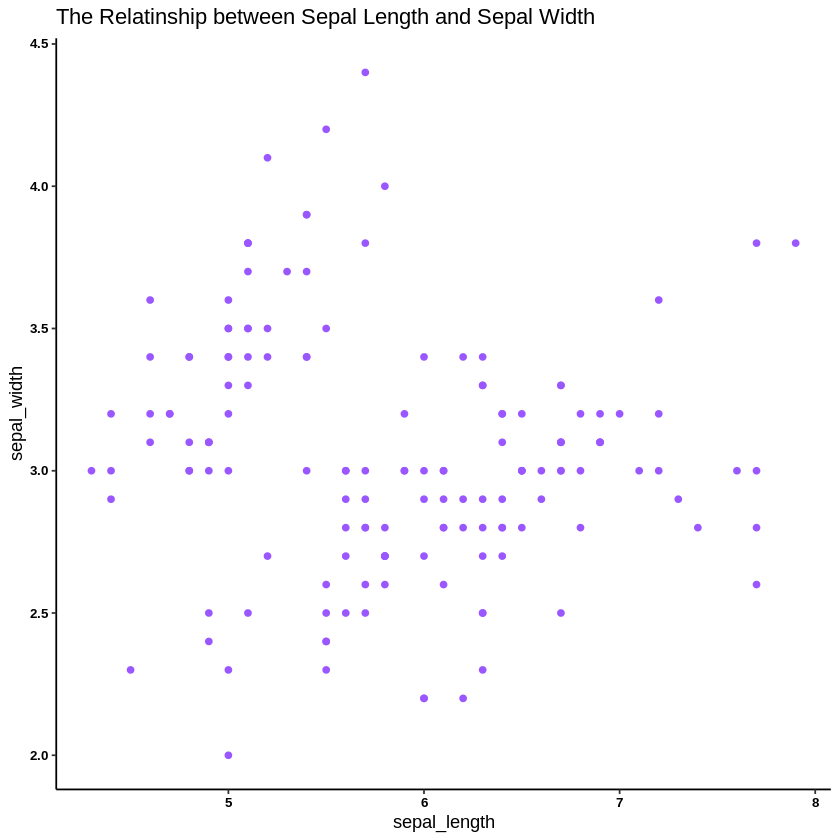

In [9]:
ggplot(iris,aes(sepal_length,sepal_width))+
  geom_point(color='#9B57FF')+
  theme_classic()+
  theme(axis.text.x = element_text(size=8, face="bold", color = "black"),
        axis.text.y = element_text(size=8, face="bold", color = "black"))+
  labs(title = 'The Relatinship between Sepal Length and Sepal Width')

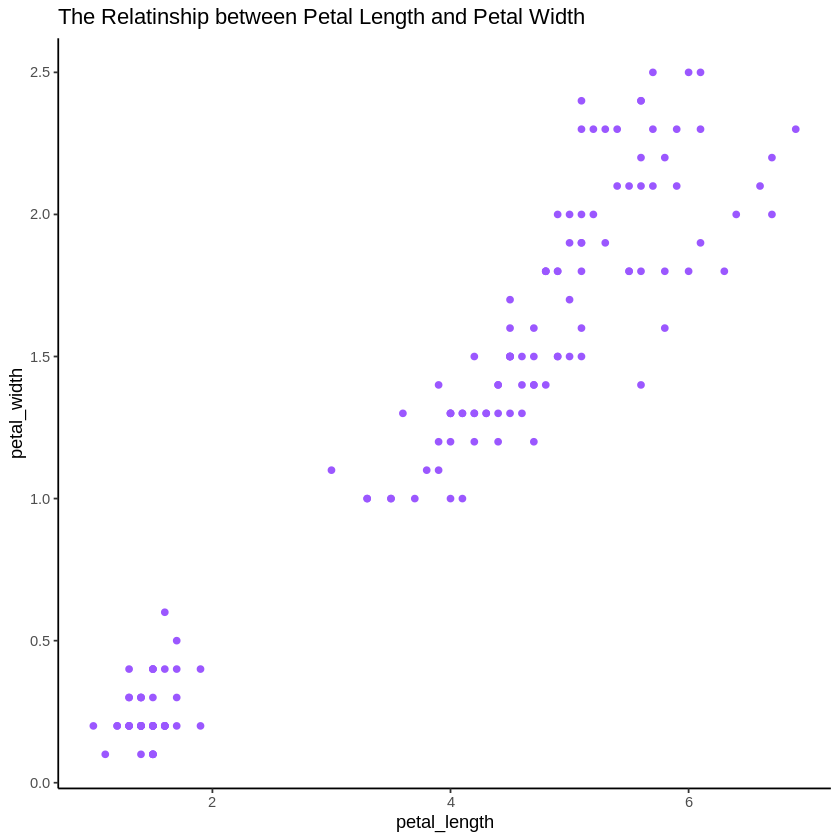

In [10]:
ggplot(iris,aes(petal_length,petal_width))+
  geom_point(color='#9B57FF')+
  theme_classic()+
  labs(title = 'The Relatinship between Petal Length and Petal Width')

### **Categorical variable**

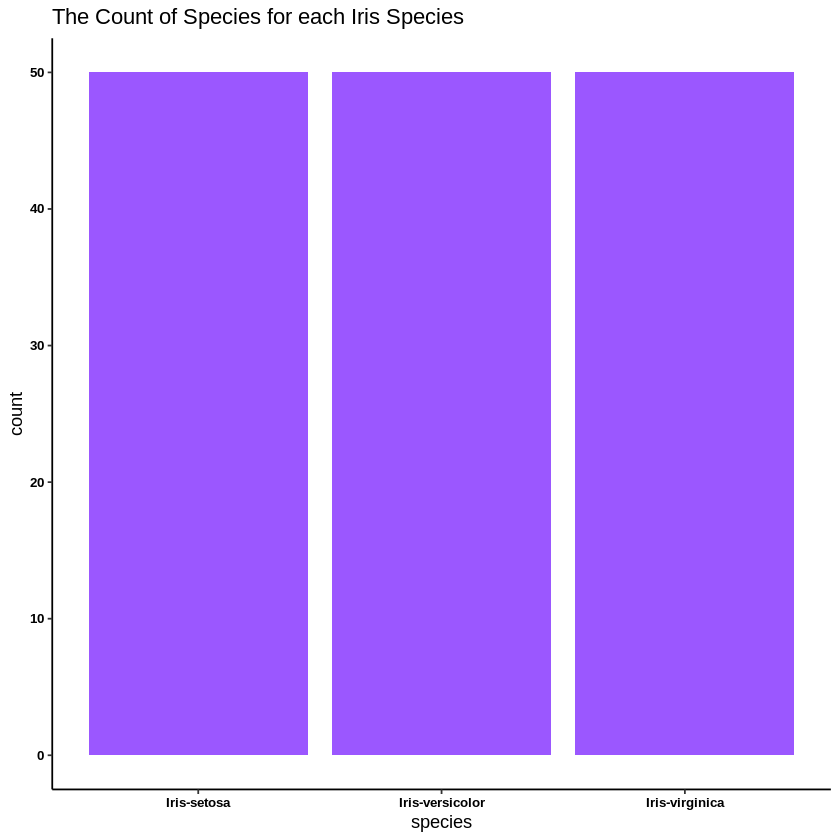

In [11]:
ggplot(iris,aes(species))+
  geom_bar(fill='#9B57FF')+
  theme_classic()+
  theme(axis.text.x = element_text(size=8, face="bold", color = "black"),
        axis.text.y = element_text(size=8, face="bold", color = "black"))+
  labs(title = 'The Count of Species for each Iris Species')

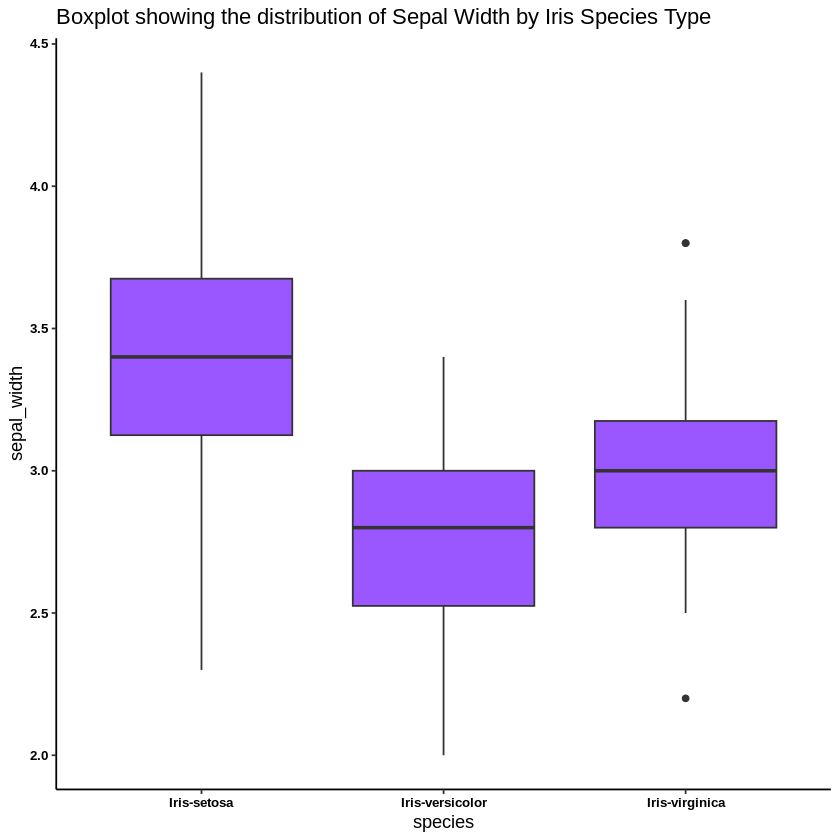

In [12]:
ggplot(iris,aes(species,sepal_width))+
  geom_boxplot(fill='#9B57FF')+
  theme_classic()+
  theme(axis.text.x = element_text(size=8, face="bold", color = "black"),
        axis.text.y = element_text(size=8, face="bold", color = "black"))+
  labs(title = 'Boxplot showing the distribution of Sepal Width by Iris Species Type')

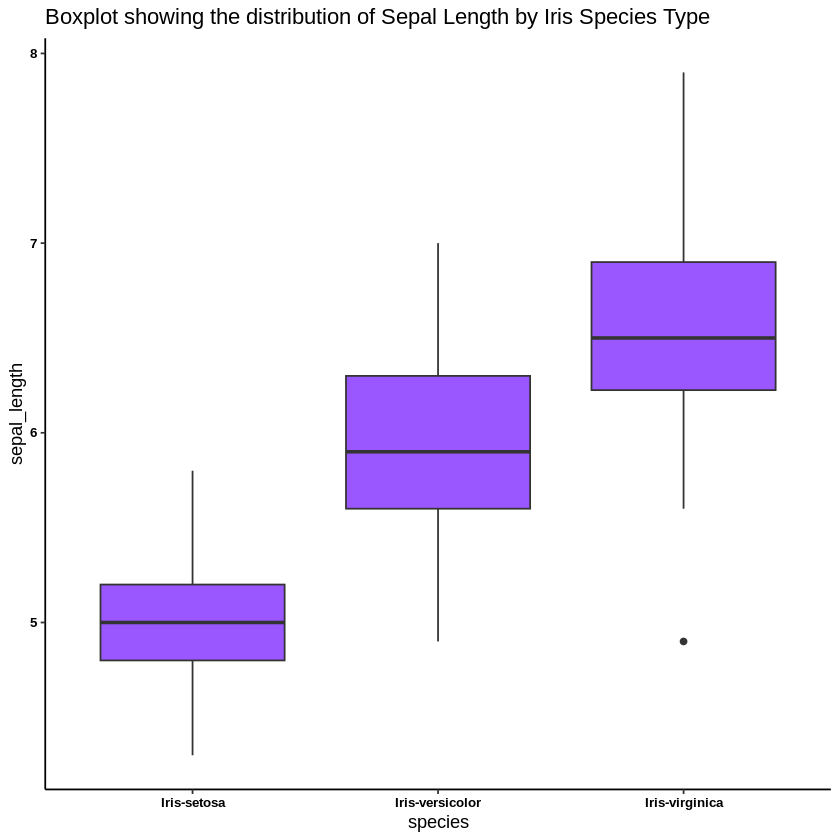

In [13]:
ggplot(iris,aes(species,sepal_length))+
  geom_boxplot(fill='#9B57FF')+
  theme_classic()+
  theme(axis.text.x = element_text(size=8, face="bold", color = "black"),
        axis.text.y = element_text(size=8, face="bold", color = "black"))+
  labs(title = 'Boxplot showing the distribution of Sepal Length by Iris Species Type')

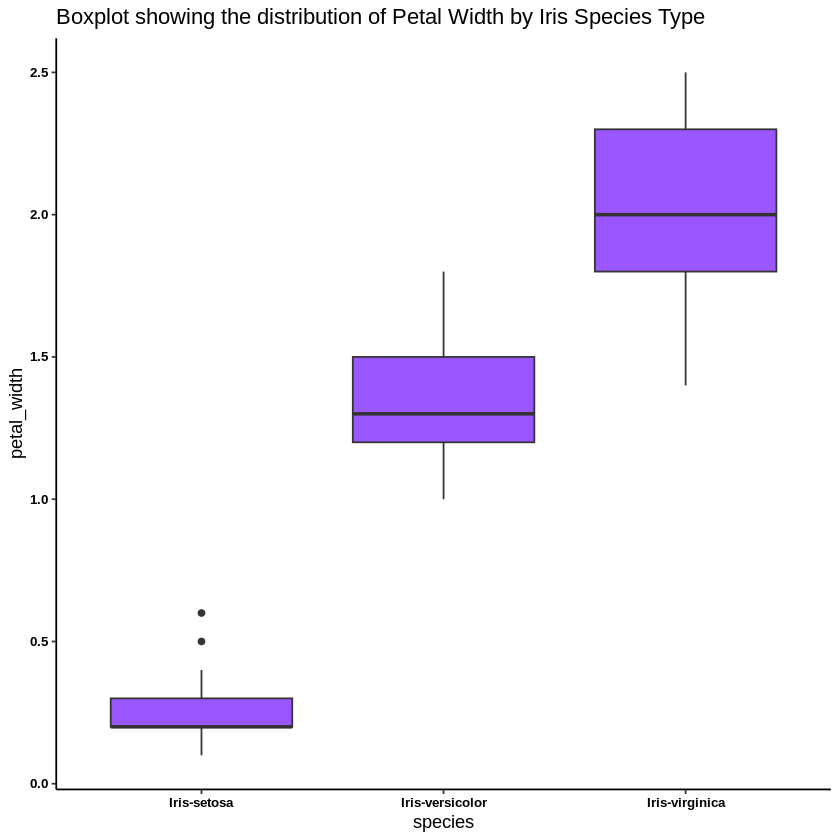

In [14]:
ggplot(iris,aes(species,petal_width))+
  geom_boxplot(fill='#9B57FF')+
  theme_classic()+
  theme(axis.text.x = element_text(size=8, face="bold", color = "black"),
        axis.text.y = element_text(size=8, face="bold", color = "black"))+
  labs(title = 'Boxplot showing the distribution of Petal Width by Iris Species Type')

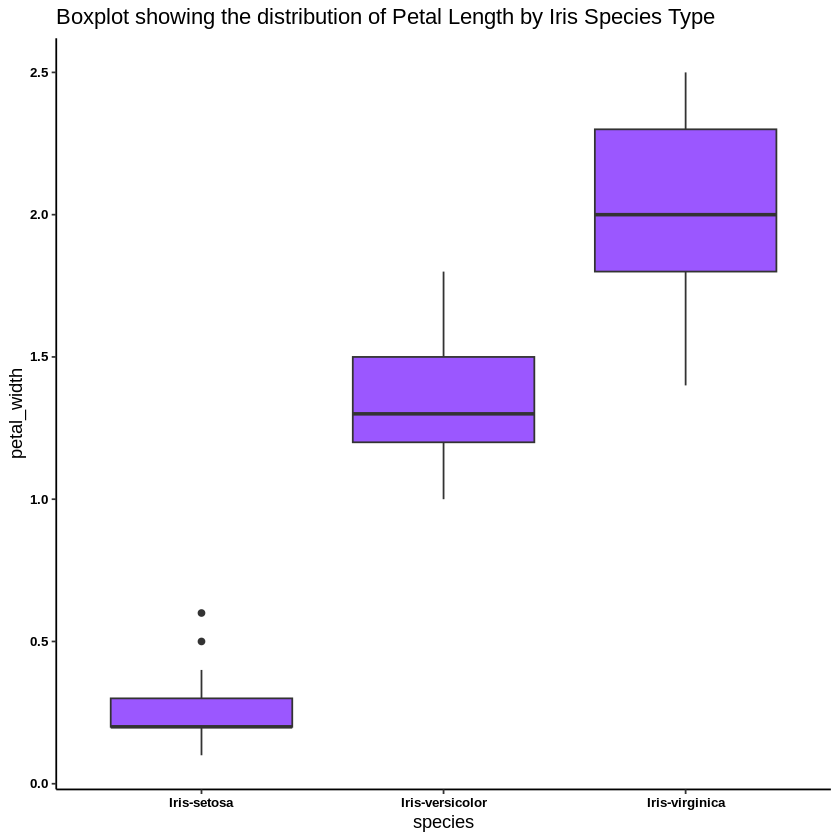

In [15]:
ggplot(iris,aes(species,petal_width))+
  geom_boxplot(fill='#9B57FF')+
  theme_classic()+
  theme(axis.text.x = element_text(size=8, face="bold", color = "black"),
        axis.text.y = element_text(size=8, face="bold", color = "black"))+
  labs(title = 'Boxplot showing the distribution of Petal Length by Iris Species Type')

In [18]:
# Only run this if the package is not already installed.
#install.packages(c("caTools","randomForest"))

## **Split dataset into two**

In [19]:
library(caTools)
set.seed(13579)
sample=sample.split(iris$species,SplitRatio=.70)
train=subset(iris,sample==TRUE)
test=subset(iris,!sample==TRUE)

## **Build a decision tree model**

In [20]:
library(randomForest)
rf.model=randomForest(species~.,train)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




## **Make a prediction using test data**

In [21]:
rf.model.test=predict(rf.model, test, type='response')

## **Model Performance**

In [ ]:
# Only run code if package is not yet installed
#install.packages("caret")

In [23]:
library(caret)
tab=table(test$species, rf.model.test)
confusionMatrix(tab)

Loading required package: lattice



Confusion Matrix and Statistics

                 rf.model.test
                  Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              15               0              0
  Iris-versicolor           0              15              0
  Iris-virginica            0               4             11

Overall Statistics
                                          
               Accuracy : 0.9111          
                 95% CI : (0.7878, 0.9752)
    No Information Rate : 0.4222          
    P-Value [Acc > NIR] : 7.909e-12       
                                          
                  Kappa : 0.8667          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Iris-setosa Class: Iris-versicolor
Sensitivity                      1.0000                 0.7895
Specificity                      1.0000                 1.0000
Pos Pred Value                   1.0000                 1.0000
Neg Pred V

## **Conclusion**

**The decision tree model utilized in the iris flower classification task achieved a commendable accuracy of 0.9185. This indicates that the model performed well in accurately classifying the different species of iris flowers based on the provided features. With an accuracy rate of nearly 91.11%, the decision tree model showcases its effectiveness in distinguishing between the various iris flower categories.**

**This outcome highlights the potential of machine learning algorithms in solving classification problems and gaining insights from complex datasets. By leveraging the power of data analysis and pattern recognition, the decision tree model can assist in accurately identifying and categorizing iris flowers, contributing to our understanding of their characteristics and aiding in various applications such as botany and horticulture. The achieved accuracy underscores the model's reliability and its potential to be utilized in real-world scenarios for iris flower classification tasks.**